In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_regression

In [4]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [5]:
X

array([[ 0.24376241,  1.49593915],
       [ 0.93304162, -1.191029  ],
       [ 2.1386075 ,  0.25233172],
       ...,
       [-0.21280279,  0.222026  ],
       [-0.65348505, -0.26515215],
       [ 1.41272625, -0.52022141]])

In [6]:
y

array([ 8.88173678e+01, -2.24803568e+01,  1.03403849e+02,  3.35483708e+01,
        5.26842895e+01, -2.17940937e+00,  7.74017414e+01,  1.00988094e+02,
        6.22540322e+00,  8.87941298e+00,  3.84710850e+01, -1.62738313e+02,
        2.26043435e+01, -5.42460598e+01, -2.92624681e+01,  1.07148834e+02,
       -9.79160291e+00,  9.38079117e+01, -6.67297431e+00,  5.42076873e+01,
       -3.33973413e+01, -3.08581195e+01, -2.50572958e+01,  3.23390170e+00,
        1.55609651e+01, -6.47605038e+01, -5.46513521e+01, -7.08966400e+01,
        2.54695427e+01,  1.11271281e+01,  3.15125062e+01,  2.42347024e+01,
       -2.57571773e+01, -1.30422823e+01,  8.98500098e+01, -7.16995057e+00,
       -5.06030550e+01,  4.11060150e+01,  6.34983098e+01, -1.67025478e+01,
        4.08770007e+00,  5.28816473e+01, -3.02264868e+01,  1.60064005e+01,
        1.54176126e+01,  1.29210774e+02, -3.96111930e+00,  6.44946126e+00,
        6.09490908e+01, -3.54066226e+01, -8.93618645e+01,  5.01507088e+01,
        9.20023678e+01, -

In [7]:
pd.DataFrame(X)[0]

0      0.243762
1      0.933042
2      2.138608
3     -0.496109
4      0.732432
         ...   
995   -0.718000
996   -1.128493
997   -0.212803
998   -0.653485
999    1.412726
Name: 0, Length: 1000, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

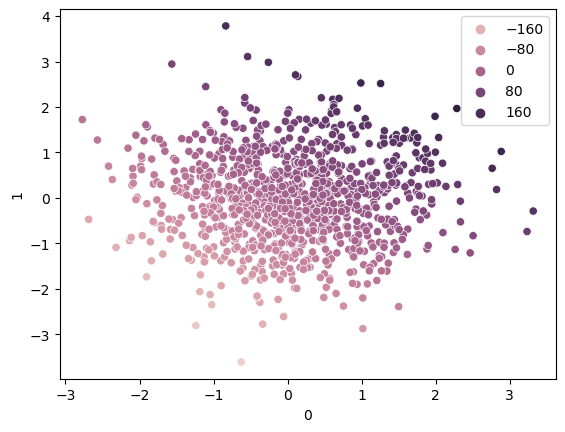

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [11]:
from sklearn.svm import SVR

In [12]:
svr=SVR()

In [13]:
svr.fit(X_train,y_train)

SVR()

In [14]:
svr.predict(X_test)

array([ 41.1852707 ,  68.40295102, -52.9485546 ,  44.46677076,
       -12.35791756, -44.00201467,   0.20314429,  39.21710957,
       -44.12212495, -40.62591677,  32.34250464,  60.4416852 ,
       -31.05340085,  61.42970077,  77.35306142, -31.76532404,
         9.9178213 , -19.75742906, -22.59686894, -67.13074079,
       -39.24757567, -19.78540061, -61.97629775, -30.37731757,
        59.67169899, -11.62236065, -45.34314143,  74.51013855,
        10.07674857,  62.30607555, -24.54807943, -62.00242106,
        11.87166629, -35.8639663 , -26.66577334, -22.73177487,
        32.94074724, -24.25570649,  22.13510798,  -4.14496929,
         5.73139604,  11.55246738, -67.92263251, -54.83989509,
        29.45449605,  59.74598542,  50.54648058, -27.19006991,
       -30.38218829,   1.83067794, -59.45022964, -42.62872247,
        -3.6546641 ,  -4.57389028, -39.00951448, -35.41293539,
        16.50894373,  49.51568547, -22.29011962, -18.02890198,
       -58.22244749,  28.69958424,  21.5694072 , -57.25

In [15]:
from sklearn.metrics import r2_score

In [26]:
acc=r2_score(y_test,svr.predict(X_test))

In [27]:
acc

0.7636423071570406

In [18]:
# hyperparameter

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param={
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['linear'],
    'epsilon':[0.1,0.2,0.3]
}

In [21]:
grd=GridSearchCV(svr,param_grid=param,cv=5)

In [41]:
grd

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']})

In [22]:
grd.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']})

In [23]:
grd.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [24]:
y_pred=grd.predict(X_test)

In [25]:
print(r2_score(y_pred,y_test))

0.9979260283046784
